<h1><center> DS 300 - PE4: Artificial Neural Networks</center></h1>

## Introduction:

A multilayer perceptron (MLP) is a fully connected class of feed-forward artificial neural network (ANN). In this exercise, we will be using a MLP model to predict customers who will leave the company (churn prediction).

The aim is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

## Dataset

It consists of 10,000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

+ **RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

+ **CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

+ **Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

+ **CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

+ **Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

+ **Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

+ **Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

+ **Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

+ **Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

+ **NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

+ **HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

+ **IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

+ **EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

+ **Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Setup:

This exercise is preferably done on `Google's Colab` cloud platform with GPU accelerator enabled. 

If you decide to run it on your own computer, make sure you've installed Tensorflow and Keras.

```
conda install tensorflow
conda install keras
```

## Question 1:

#### Import all the necessary libraries.

In [1]:
# Importing the libraries




#### Load the dataset from [URL](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lec24_bank.csv) into a DataFrame named as `df`.

In [2]:
# Importing the dataset




df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Show the basic information of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Question 2:

#### Since columns `RowNumber`, `CustomerId` and `Surname` are definitely not going to make a huge impact on the prediction, let's remove them from the DataFrame.

#### Show the missing values.

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Find the number of occurrences for `Exited` versus not `Exited` customers.

0    7963
1    2037
Name: Exited, dtype: int64

## Question 3:

#### Feature correlation analysis with a heatmap

<AxesSubplot:>

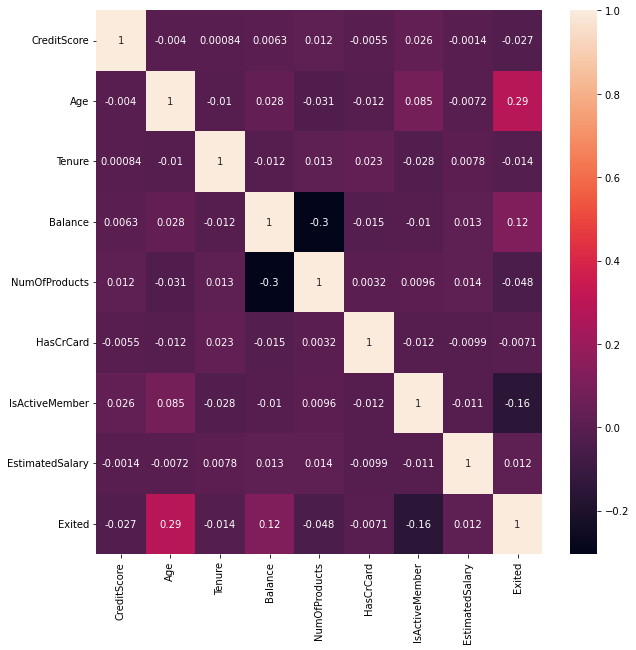

In [7]:
plt.figure(figsize=(10, 10))




#### Plot the count of the categorical variables `Geography` and `Gender`, and color-code the results with the dependent variable.

<AxesSubplot:xlabel='Gender', ylabel='count'>

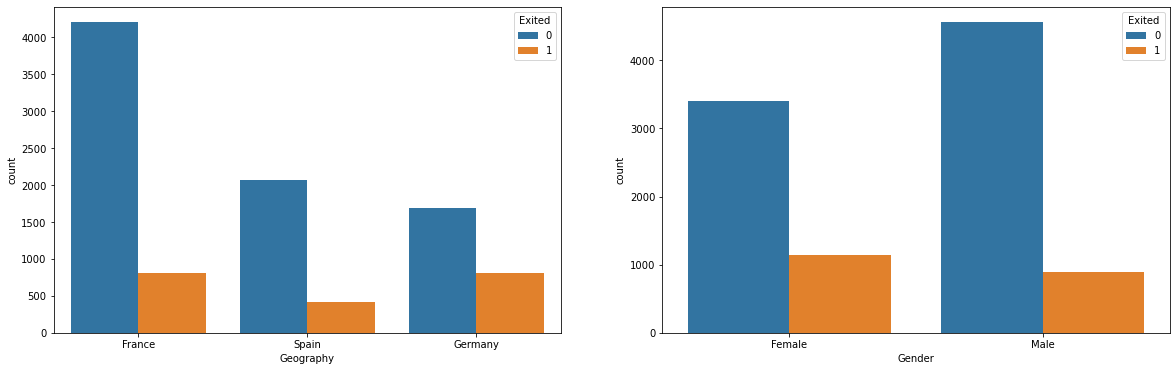

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))




## Question 4:

#### One-hot encode the categorical features.

In [9]:
from 



#### Split the DataFrame into feature matrix X and label vector y.

In [11]:
X = 
y = 

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_Germany,x0_Spain,x1_Male
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Question 5:

#### Split the dataset into traning set and testing set. Ensure to use test size 20% and random seed as 101.

In [14]:
# Splitting the dataset into the Training set and Test set




#### Perform feature scaling on both training and testing sets.

In [15]:
# Feature Scaling






## Question 6:

#### First, read the Keras tutorial for sequential model [here](https://keras.io/getting-started/sequential-model-guide/)

#### Then import the necessary libraries as below.

In [16]:
# Importing the Keras libraries and packages





#### Create an empty classifer object with the Sequential model.

In [17]:
# Initialising the ANN model object
model = 



2022-10-10 22:34:11.839936: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Now, let's add 4 layers to the ANN model. 
#### Firstly, add the input layer and the first hidden layer. 
+ Configure the `input_dim` argument to represent the input layer. 
+ For the first hidden layer, use `6` as the number of nodes (neurons), and use rectifier function `relu` as the activation function.

In [18]:
# Adding the input layer and the first hidden layer




#### Then add in the 2nd hidden layer. Note you don't need to specify input dimension `input_dim` this time as we have defined the model to be sequential so keras will automatically consider input dimension to be same as the output of the last layer. Use `6` nodes and `relu` again.

In [19]:
# Adding the second hidden layer




#### Finally, add the last output layer. Ensure you have only a single node (neuron) for the output layer as we just need a binary decision. The activation function here should be `sigmoid`.

In [20]:
# Adding the output layer




#### Show the hyperparameters in the ANN model so far in a summary table.

Model: "pe4-ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### Compile the ANN with the `adam` optimizer, `binary_crossentropy` loss function, and `accuracy` as the metrics.

In [22]:
# Compiling the ANN





## Question 7:

#### Train the ANN model with training set. Use mini batch size as 10, and the total number of epoch as 100.
#### Now it's the time to grab a coffee or fix your makeups.

In [23]:
# Fitting the ANN to the Training set




Epoch 1/100
800/800 [==============================] - 1s 906us/step - loss: 0.5028 - accuracy: 0.7805
Epoch 2/100
800/800 [==============================] - 1s 815us/step - loss: 0.4441 - accuracy: 0.8018
Epoch 3/100
800/800 [==============================] - 1s 779us/step - loss: 0.4238 - accuracy: 0.8146
Epoch 4/100
800/800 [==============================] - 1s 789us/step - loss: 0.4135 - accuracy: 0.8241
Epoch 5/100
800/800 [==============================] - 1s 777us/step - loss: 0.4083 - accuracy: 0.8265
Epoch 6/100
800/800 [==============================] - 1s 795us/step - loss: 0.4038 - accuracy: 0.8309
Epoch 7/100
800/800 [==============================] - 1s 781us/step - loss: 0.4006 - accuracy: 0.8282
Epoch 8/100
800/800 [==============================] - 1s 784us/step - loss: 0.3977 - accuracy: 0.8291
Epoch 9/100
800/800 [==============================] - 1s 822us/step - loss: 0.3944 - accuracy: 0.8305
Epoch 10/100
800/800 [==============================] - 1s 783us/step - l

800/800 [==============================] - 1s 804us/step - loss: 0.3387 - accuracy: 0.8595
Epoch 81/100
800/800 [==============================] - 1s 790us/step - loss: 0.3391 - accuracy: 0.8606
Epoch 82/100
800/800 [==============================] - 1s 773us/step - loss: 0.3396 - accuracy: 0.8622
Epoch 83/100
800/800 [==============================] - 1s 771us/step - loss: 0.3390 - accuracy: 0.8609
Epoch 84/100
800/800 [==============================] - 1s 773us/step - loss: 0.3388 - accuracy: 0.8596
Epoch 85/100
800/800 [==============================] - 1s 776us/step - loss: 0.3383 - accuracy: 0.8606
Epoch 86/100
800/800 [==============================] - 1s 782us/step - loss: 0.3384 - accuracy: 0.8602
Epoch 87/100
800/800 [==============================] - 1s 860us/step - loss: 0.3385 - accuracy: 0.8596
Epoch 88/100
800/800 [==============================] - 1s 797us/step - loss: 0.3385 - accuracy: 0.8597
Epoch 89/100
800/800 [==============================] - 1s 768us/step - loss:

#### Evaluate the classifier with confusion matrix and accuracy score.

In [24]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = 


y_pred[:10]

array([[0.0749962 ],
       [0.06665799],
       [0.57007647],
       [0.02187812],
       [0.724202  ],
       [0.01598009],
       [0.38541433],
       [0.01577127],
       [0.07238346],
       [0.08455554]], dtype=float32)

#### Note that `y_pred` is the probability as we use sigmoid activation function for the output layer. Now convert the probability into a binary number with a threshold probability 0.5

In [25]:
y_pred = 



In [26]:
# Making the Confusion Matrix





Confusion matrix:
 [[1511   66]
 [ 200  223]]
Accuracy:  0.867


## Question 8:

#### We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training. And we can take steps before the completion of all epochs.

#### Now supply `validation_data` argument to the `fit` function and retrain the model.

In [27]:
history = 




Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8624 - val_loss: 0.3334 - val_accuracy: 0.8640
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8627 - val_loss: 0.3332 - val_accuracy: 0.8655
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8619 - val_loss: 0.3328 - val_accuracy: 0.8650
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8615 - val_loss: 0.3326 - val_accuracy: 0.8655
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8621 - val_loss: 0.3326 - val_accuracy: 0.8655
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8622 - val_loss: 0.3327 - val_accuracy: 0.8660
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8611 - val_loss: 0.3327 - val_accuracy: 0.8650

Epoch 58/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8618 - val_loss: 0.3326 - val_accuracy: 0.8645
Epoch 59/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8621 - val_loss: 0.3328 - val_accuracy: 0.8635
Epoch 60/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8626 - val_loss: 0.3325 - val_accuracy: 0.8640
Epoch 61/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8604 - val_loss: 0.3321 - val_accuracy: 0.8660
Epoch 62/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8631 - val_loss: 0.3320 - val_accuracy: 0.8640
Epoch 63/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8625 - val_loss: 0.3324 - val_accuracy: 0.8655
Epoch 64/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8629 - val_loss: 0.3330 - val_accuracy:

#### Note that now we have two extra readings: `val_loss` and `val_acc`. Our model is working fine. Now we will visualize training and validation losses and accuracies.
Hint: try `history.history`

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

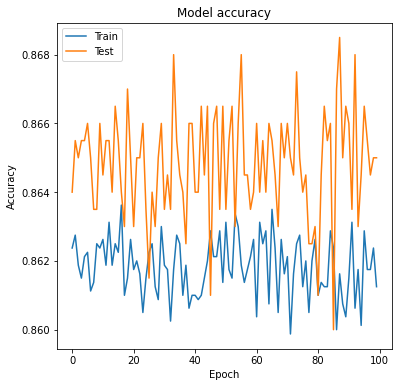

In [29]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')





## Great job!